## Available Datasets:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


## Potential Questions:
* What movies tend to get higher vote counts and vote averages on TMDB?
* What are the titles of the top 10 highest-grossing movies?
* What is the average runtime of movies in the dataset?
* How many movies were released each year?
* What are the most common genres in the dataset?


## Importing Dataset

In [2]:
movies = pd.read_csv("/kaggle/input/the-movies-dataset/movies_metadata.csv")

/tmp/ipykernel_20/813178880.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("/kaggle/input/the-movies-dataset/movies_metadata.csv")


## Data Exploration

In [3]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [4]:
movies.shape

(45466, 24)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
movies.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [7]:
missing_values = (movies.isnull().sum()) / (len(movies)) * 100
missing_values.sort_values(ascending = False, inplace = True)

## Data Cleaning

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


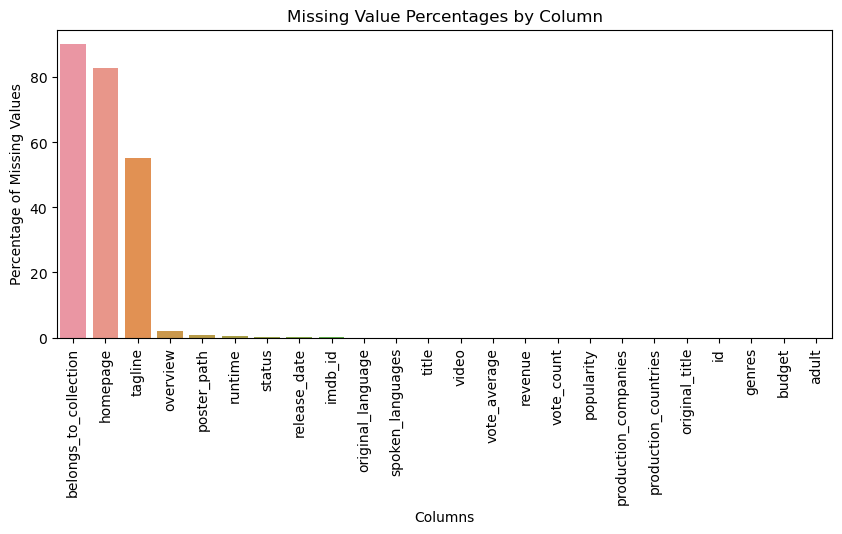

In [9]:
plt.figure(figsize=(10,4))
sns.barplot(x = missing_values.index, y = missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Value Percentages by Column')
plt.show()

In [10]:
movies.drop(['belongs_to_collection', 'homepage', 'tagline', 'poster_path', 'overview', 'imdb_id', 'spoken_languages'], axis = 1, inplace = True)

In [11]:
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [12]:
movies['production_companies'] = movies['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [13]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [14]:
movies.dtypes

adult                    object
budget                   object
genres                   object
id                       object
original_language        object
original_title           object
popularity               object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
status                   object
title                    object
video                    object
vote_average            float64
vote_count              float64
dtype: object

In [15]:
movies['budget'] = pd.to_numeric(movies['budget'], errors = 'coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')
movies['id'] = pd.to_numeric(movies['id'], errors = 'coerce')

In [16]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')

In [17]:
movies['adult'] = np.where(movies['adult'] == 'True', 1, 0)

In [18]:
movies['video'] = np.where(movies['video'] == True, 1, 0)

In [19]:
movies['budget'].fillna(value = movies['budget'].mean(), inplace = True)

In [20]:
movies.original_language.value_counts()

en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: original_language, Length: 92, dtype: int64

In [21]:
movies['original_language'].fillna(value = 'en', inplace = True)

In [22]:
movies['popularity'].fillna(value = movies['popularity'].median(), inplace = True)

In [23]:
movies.dropna(subset = ['release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count'], inplace = True)

In [24]:
movies['budget'] = movies['budget'].replace(0, np.nan)
movies['revenue'] = movies['revenue'].replace(0, np.nan)

In [25]:
movies.isnull().sum()

adult                       0
budget                  36181
genres                      0
id                          0
original_language           0
original_title              0
popularity                  0
production_companies        0
production_countries        0
release_date                0
revenue                 37654
runtime                     0
status                      0
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64

In [26]:
movies.shape

(45054, 17)

## Visualization

In [27]:
import plotly.express as px

fig = px.bar(x = missing_values.index, y = missing_values.values)
fig.show()

In [28]:
top_10_highest_grossing = movies.sort_values('revenue', ascending = False).head(10)
top_10_highest_grossing

adult       budget                                          genres  \
14551      0  237000000.0   [Action, Adventure, Fantasy, Science Fiction]   
26555      0  245000000.0   [Action, Adventure, Science Fiction, Fantasy]   
1639       0  200000000.0                      [Drama, Romance, Thriller]   
17818      0  220000000.0            [Science Fiction, Action, Adventure]   
25084      0  150000000.0  [Action, Adventure, Science Fiction, Thriller]   
28830      0  190000000.0                                        [Action]   
26558      0  280000000.0            [Action, Adventure, Science Fiction]   
17437      0  125000000.0                    [Family, Fantasy, Adventure]   
22110      0  150000000.0                  [Animation, Adventure, Family]   
42222      0  160000000.0                      [Family, Fantasy, Romance]   

             id original_language  \
14551   19995.0                en   
26555  140607.0                en   
1639      597.0                en   
17818   24428.0                en   
25084  135397.0                en   
28830  168259.0                en   
26558   99861.0                en   
17437   12445.0                en   
22110  109445.0                en   
42222  321612.0                en   

                                     original_title  popularity  \
14551                                        Avatar  185.070892   
26555                  Star Wars: The Force Awakens   31.626013   
1639                                        Titanic   26.889070   
17818                                  The Avengers   89.887648   
25084                                Jurassic World   32.790475   
28830                                     Furious 7   27.275687   
26558                       Avengers: Age of Ultron   37.379420   
17437  Harry Potter and the Deathly Hallows: Part 2   24.990737   
22110                                        Frozen   24.248243   
42222                          Beauty and the Beast  287.253654   

                                    production_companies  \
14551  [Ingenious Film Partners, Twentieth Century Fo...   
26555      [Lucasfilm, Truenorth Productions, Bad Robot]   
1639   [Paramount Pictures, Twentieth Century Fox Fil...   
17818               [Paramount Pictures, Marvel Studios]   
25084  [Universal Studios, Amblin Entertainment, Lege...   
28830  [Universal Pictures, Original Film, Fuji Telev...   
26558  [Marvel Studios, Prime Focus, Revolution Sun S...   
17437                       [Warner Bros., Heyday Films]   
22110  [Walt Disney Pictures, Walt Disney Animation S...   
42222           [Walt Disney Pictures, Mandeville Films]   

                             production_countries release_date       revenue  \
14551  [United States of America, United Kingdom]   2009-12-10  2.787965e+09   
26555                  [United States of America]   2015-12-15  2.068224e+09   
1639                   [United States of America]   1997-11-18  1.845034e+09   
17818                  [United States of America]   2012-04-25  1.519558e+09   
25084                  [United States of America]   2015-06-09  1.513529e+09   
28830           [Japan, United States of America]   2015-04-01  1.506249e+09   
26558                  [United States of America]   2015-04-22  1.405404e+09   
17437  [United Kingdom, United States of America]   2011-07-07  1.342000e+09   
22110                  [United States of America]   2013-11-27  1.274219e+09   
42222  [United Kingdom, United States of America]   2017-03-16  1.262886e+09   

       runtime    status                                         title  video  \
14551    162.0  Released                                        Avatar      0   
26555    136.0  Released                  Star Wars: The Force Awakens      0   
1639     194.0  Released                                       Titanic      0   
17818    143.0  Released                                  The Avengers      0   
25084    124.0  Released                                Jurassic W

In [29]:
top_10_highest_grossing = movies.sort_values('revenue', ascending = False).head(10)

fig = px.bar(
    top_10_highest_grossing,
    x = 'revenue',
    y = 'title',
    orientation = 'h',
    title = 'Top 10 Highest-Grossing Movies',
    labels = {'revenue': 'Revenue', 'title': 'Movie Titles'}
)

fig.update_layout(yaxis_categoryorder = 'total ascending')
fig.show()

In [30]:
fig = px.box(movies, x='status', y='vote_average')
fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1592: UserWarning:

Horizontal orientation ignored with only `y` specified.



<Axes: ylabel='vote_average'>

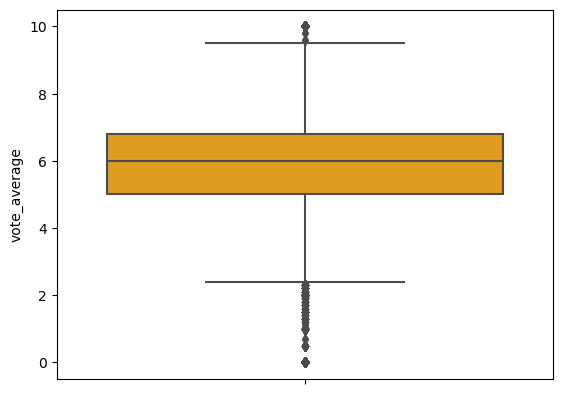

In [31]:
sns.boxplot(y = movies['vote_average'], orient = 'h', color = 'orange')

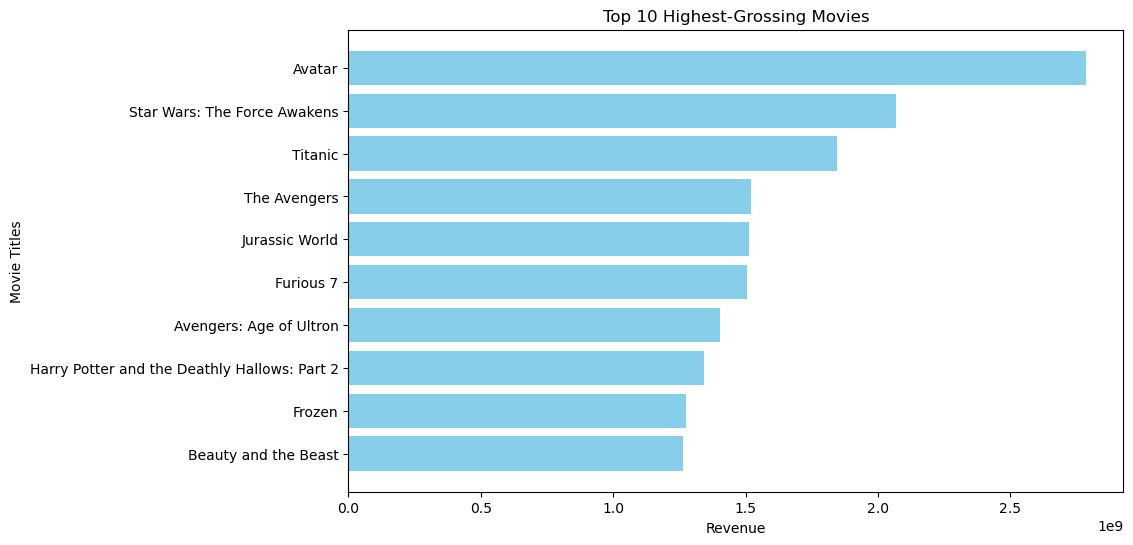

In [32]:
plt.figure(figsize=(10,6))
plt.barh(top_10_highest_grossing['title'], top_10_highest_grossing['revenue'], color = 'skyblue')
plt.xlabel('Revenue')
plt.ylabel('Movie Titles')
plt.title('Top 10 Highest-Grossing Movies')
plt.gca().invert_yaxis()
plt.show()

<Axes: >

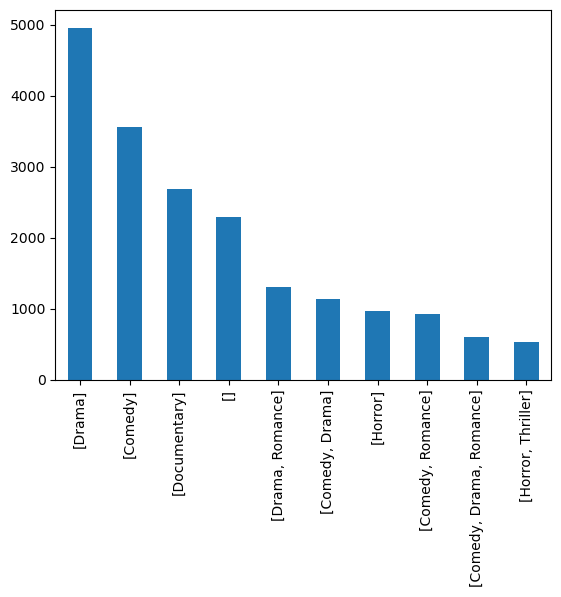

In [33]:
top_10_genres = movies.genres.value_counts().head(10)
top_10_genres.plot(kind='bar')

## Univariate Analysis

In [34]:
crew = pd.read_csv("/kaggle/input/the-movies-dataset/credits.csv")

In [35]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [36]:
movies.id.drop_duplicates(keep = 'first', inplace = True)
crew.id.drop_duplicates(keep = 'first', inplace = True)

In [37]:
movies = movies.merge(crew, on = 'id')

In [38]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

def get_star(x):
    for i in x:
        return i['name']
    return np.nan

def get_dir_gender(x):
    for i in x:
        if i['job'] == 'Director':
            return i['gender']
    return np.nan 

def get_star_gender(x):
    for i in x:
        return i['gender']
    return np.nan

In [39]:
movies['director'] = movies['crew'].apply(literal_eval).apply(get_director)
movies['director']

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
45124          John Irvin
45125            Lav Diaz
45126      Mark L. Lester
45127    Yakov Protazanov
45128       Daisy Asquith
Name: director, Length: 45129, dtype: object

In [40]:
movies['starring'] = movies['cast'].apply(literal_eval).apply(get_star)
movies['starring']

0               Tom Hanks
1          Robin Williams
2          Walter Matthau
3         Whitney Houston
4            Steve Martin
               ...       
45124      Patrick Bergin
45125        Angel Aquino
45126       Erika Eleniak
45127    Iwan Mosschuchin
45128                 NaN
Name: starring, Length: 45129, dtype: object

In [41]:
movies['gender_director'] = movies['crew'].apply(literal_eval).apply(get_dir_gender)
movies['gender_director']

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
45124    2.0
45125    0.0
45126    2.0
45127    0.0
45128    0.0
Name: gender_director, Length: 45129, dtype: float64

In [42]:
movies['gender_star'] = movies['cast'].apply(literal_eval).apply(get_star_gender)
movies['gender_star']

0        2.0
1        2.0
2        2.0
3        1.0
4        2.0
        ... 
45124    2.0
45125    1.0
45126    1.0
45127    2.0
45128    NaN
Name: gender_star, Length: 45129, dtype: float64

In [43]:
movies['year'] = movies['release_date'].dt.year
movies['month'] = movies['release_date'].dt.month

In [44]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45129 entries, 0 to 45128
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45129 non-null  int64         
 1   budget                8895 non-null   float64       
 2   genres                45129 non-null  object        
 3   id                    45129 non-null  float64       
 4   original_language     45129 non-null  object        
 5   original_title        45129 non-null  object        
 6   popularity            45129 non-null  float64       
 7   production_companies  45129 non-null  object        
 8   production_countries  45129 non-null  object        
 9   release_date          45129 non-null  datetime64[ns]
 10  revenue               7420 non-null   float64       
 11  runtime               45129 non-null  float64       
 12  status                45129 non-null  object        
 13  title           

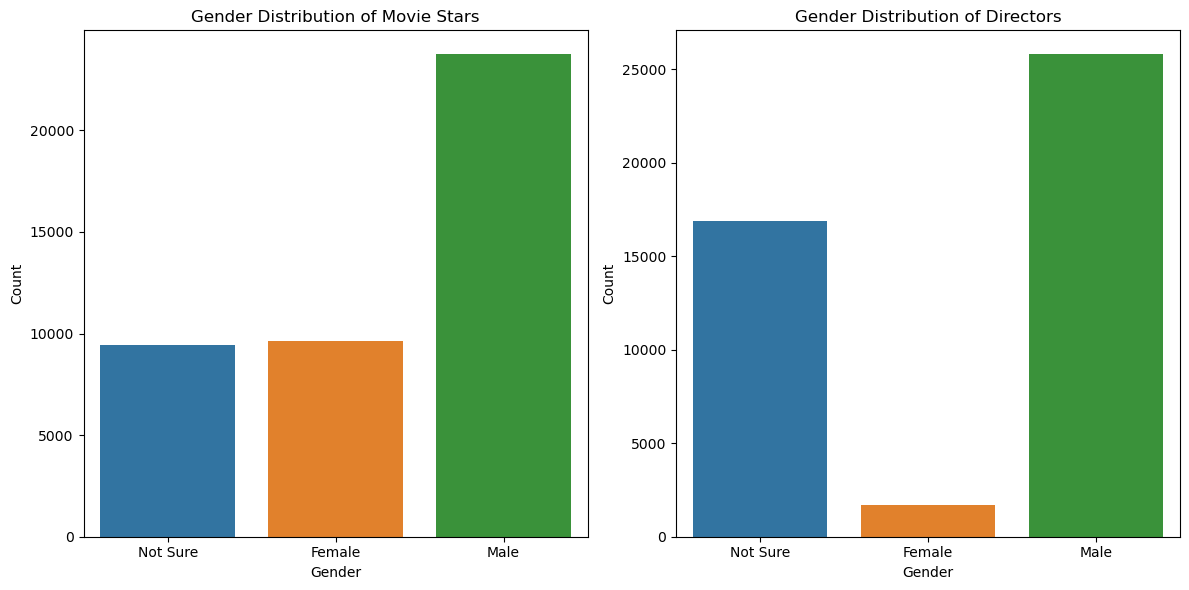

In [45]:
gender_star_counts = movies.gender_star.value_counts()
gender_director_counts = movies.gender_director.value_counts()

order = ['Not Sure', 'Female', 'Male']

fig, axs = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=axs[0], x=gender_star_counts.index, y=gender_star_counts.values)
sns.barplot(ax=axs[1], x=gender_director_counts.index, y=gender_director_counts.values)

axs[0].set_title('Gender Distribution of Movie Stars')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].set_xticks(range(len(order)))
axs[0].set_xticklabels(order)

axs[1].set_title('Gender Distribution of Directors')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')
axs[1].set_xticks(range(len(order)))
axs[1].set_xticklabels(order)

plt.tight_layout()
plt.show()

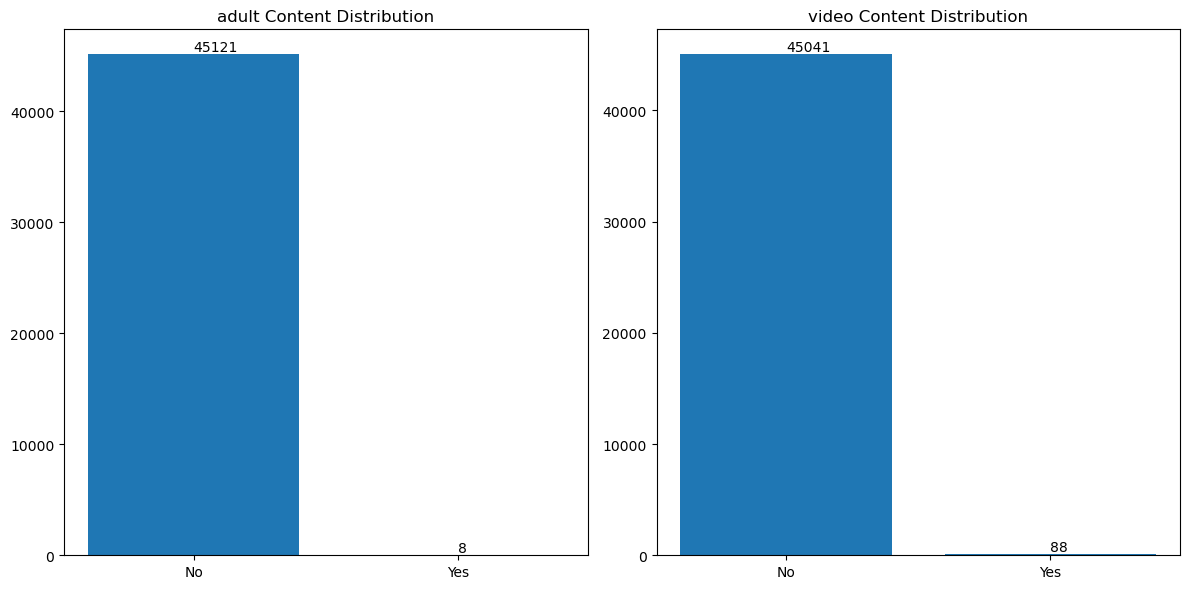

In [46]:
column_to_plot = ['adult', 'video']

fig, axes = plt.subplots(1, len(column_to_plot), figsize=(12, 6))

for ax, column in zip(axes, column_to_plot):
    value_counts = movies[column].value_counts()
    
    bars = ax.bar(value_counts.index, value_counts.values)
    ax.set_title (column + " Content Distribution")
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
    
    ax.set_xticks(value_counts.index)
    ax.set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

In [47]:
value_counts = movies['original_language'].value_counts().head(10)

fig = px.bar(
    value_counts,
    x = value_counts.index,
    y = value_counts.values,
    labels={'x': 'Language', 'y': "Frequency"},
    title = 'Bar Plot of Original Language'
)

fig.show()

<Axes: >

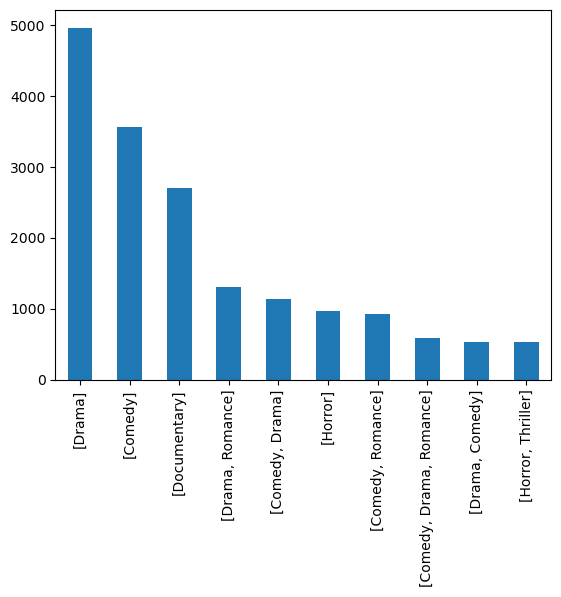

In [48]:
non_empty_genres_df = movies[movies['genres'].apply(lambda x: len(x) > 0)]
non_empty_genres_df.genres.value_counts().head(10).plot(kind='bar')

<Axes: >

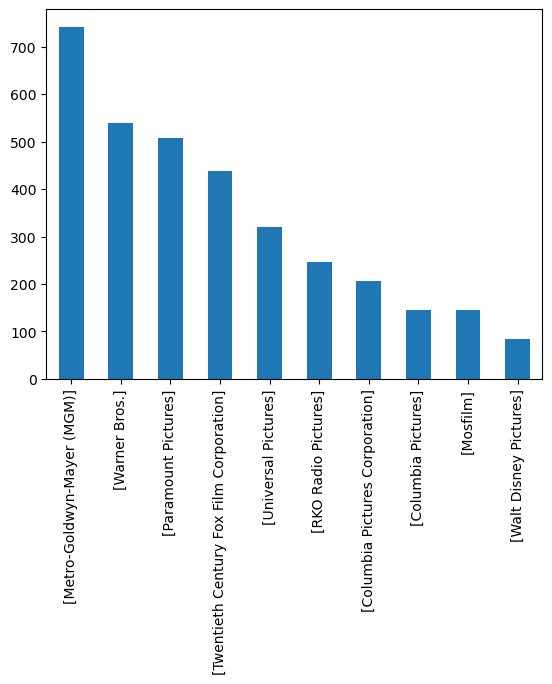

In [49]:
non_empty_companies_df = movies[movies['production_companies'].apply(lambda x: len(x) > 0)]
non_empty_companies_df.production_companies.value_counts().head(10).plot(kind='bar')

<Axes: >

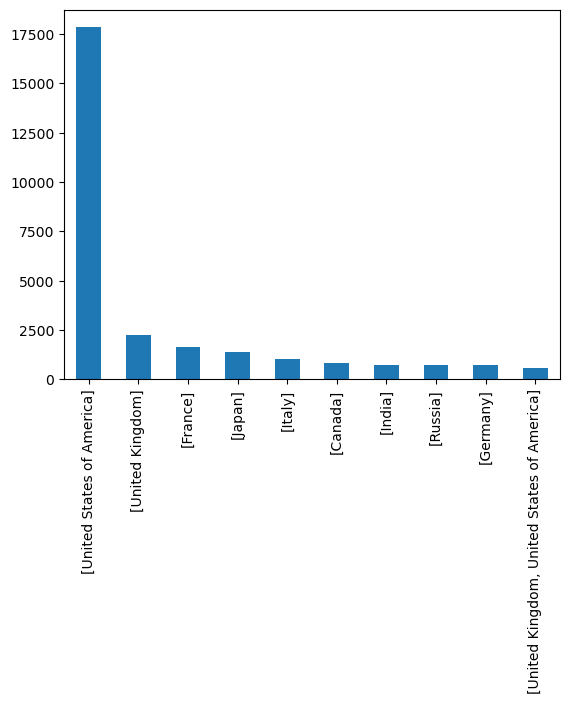

In [50]:
non_empty_countries_df = movies[movies['production_countries'].apply(lambda x: len(x) > 0)]
non_empty_countries_df.production_countries.value_counts().head(10).plot(kind='bar')

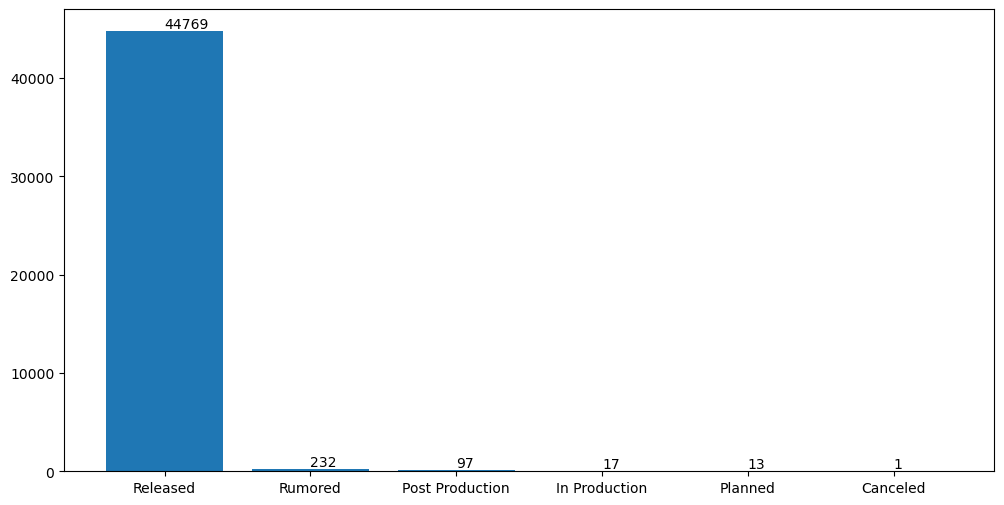

In [51]:
fig = plt.figure(figsize=(12,6))

bars = plt.bar(movies.status.value_counts().index,movies.status.value_counts().values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
plt.show()

<Axes: >

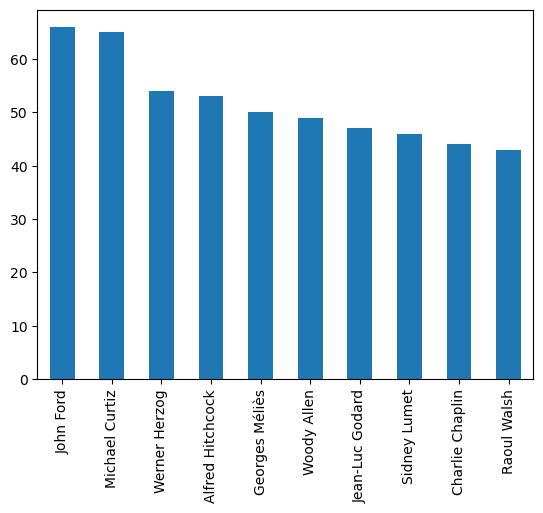

In [52]:
movies.director.value_counts().head(10).plot(kind='bar')

<Axes: >

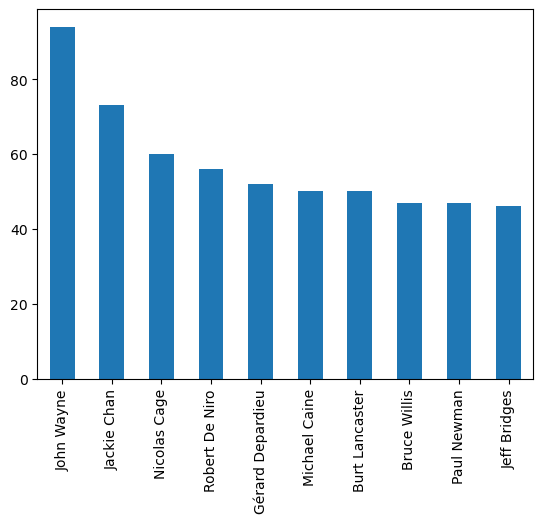

In [53]:
movies.starring.value_counts().head(10).plot(kind='bar')

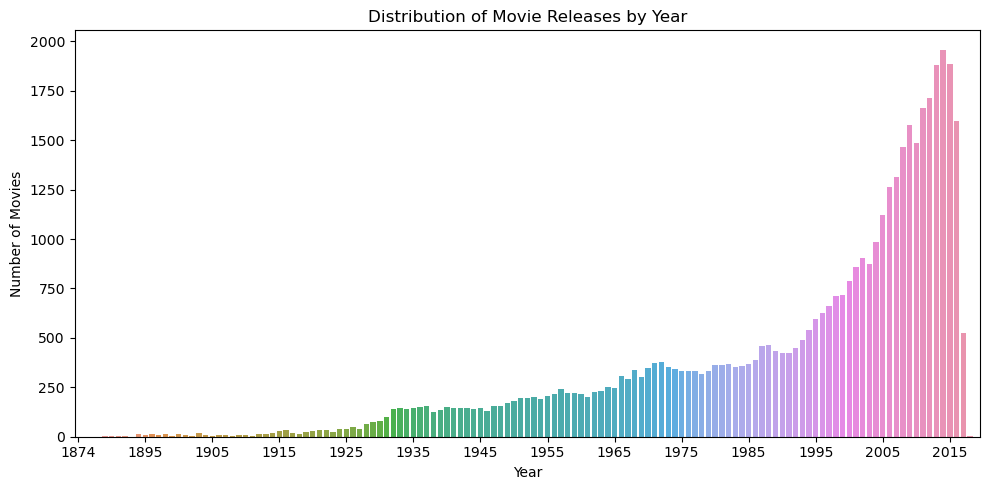

In [54]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.countplot(data=movies, x='year', ax=ax)
ax.set_title('Distribution of Movie Releases by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')

step_size = 10
ax.xaxis.set_major_locator(MultipleLocator(step_size))

plt.tight_layout()
plt.show()

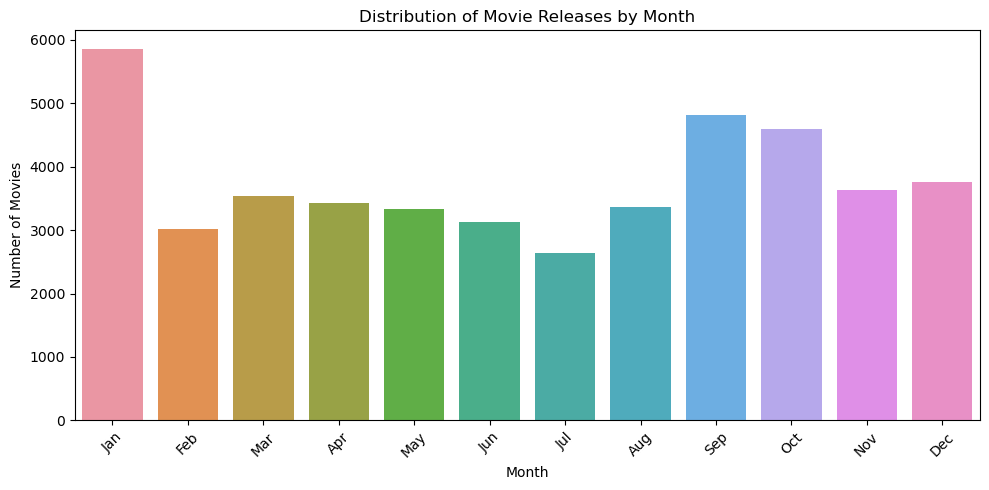

In [55]:
fig = plt.figure(figsize=(10,5))

sns.countplot(data=movies, x='month')

plt.title("Distribution of Movie Releases by Month")
plt.xlabel("Month")
plt.ylabel("Number of Movies")

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), month_names, rotation = 45)

plt.tight_layout()
plt.show()

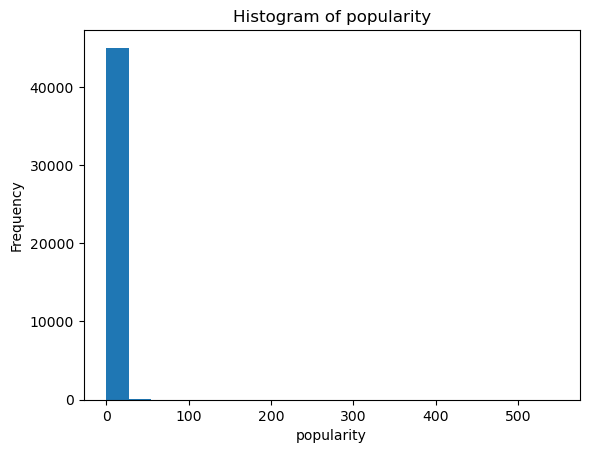

In [56]:
numerical_column = 'popularity'
plt.hist(movies[numerical_column], bins = 20)
plt.xlabel(numerical_column)
plt.ylabel('Frequency')
plt.title(f'Histogram of {numerical_column}')
plt.show()

In [57]:
movies.popularity.describe()

count    45129.000000
mean         2.946158
std          6.023420
min          0.000000
25%          0.399815
50%          1.143786
75%          3.739226
max        547.488298
Name: popularity, dtype: float64

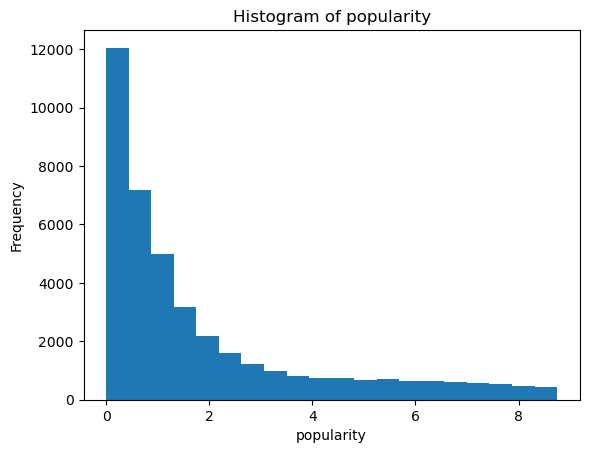

In [58]:
Q1 = movies['popularity'].quantile(0.25)
Q3 = movies['popularity'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = movies[(movies['popularity'] >= lower_bound) & (movies['popularity'] <= upper_bound)]

plt.hist(filtered_df['popularity'], bins=20)
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.title(f'Histogram of {numerical_column}')
plt.show()

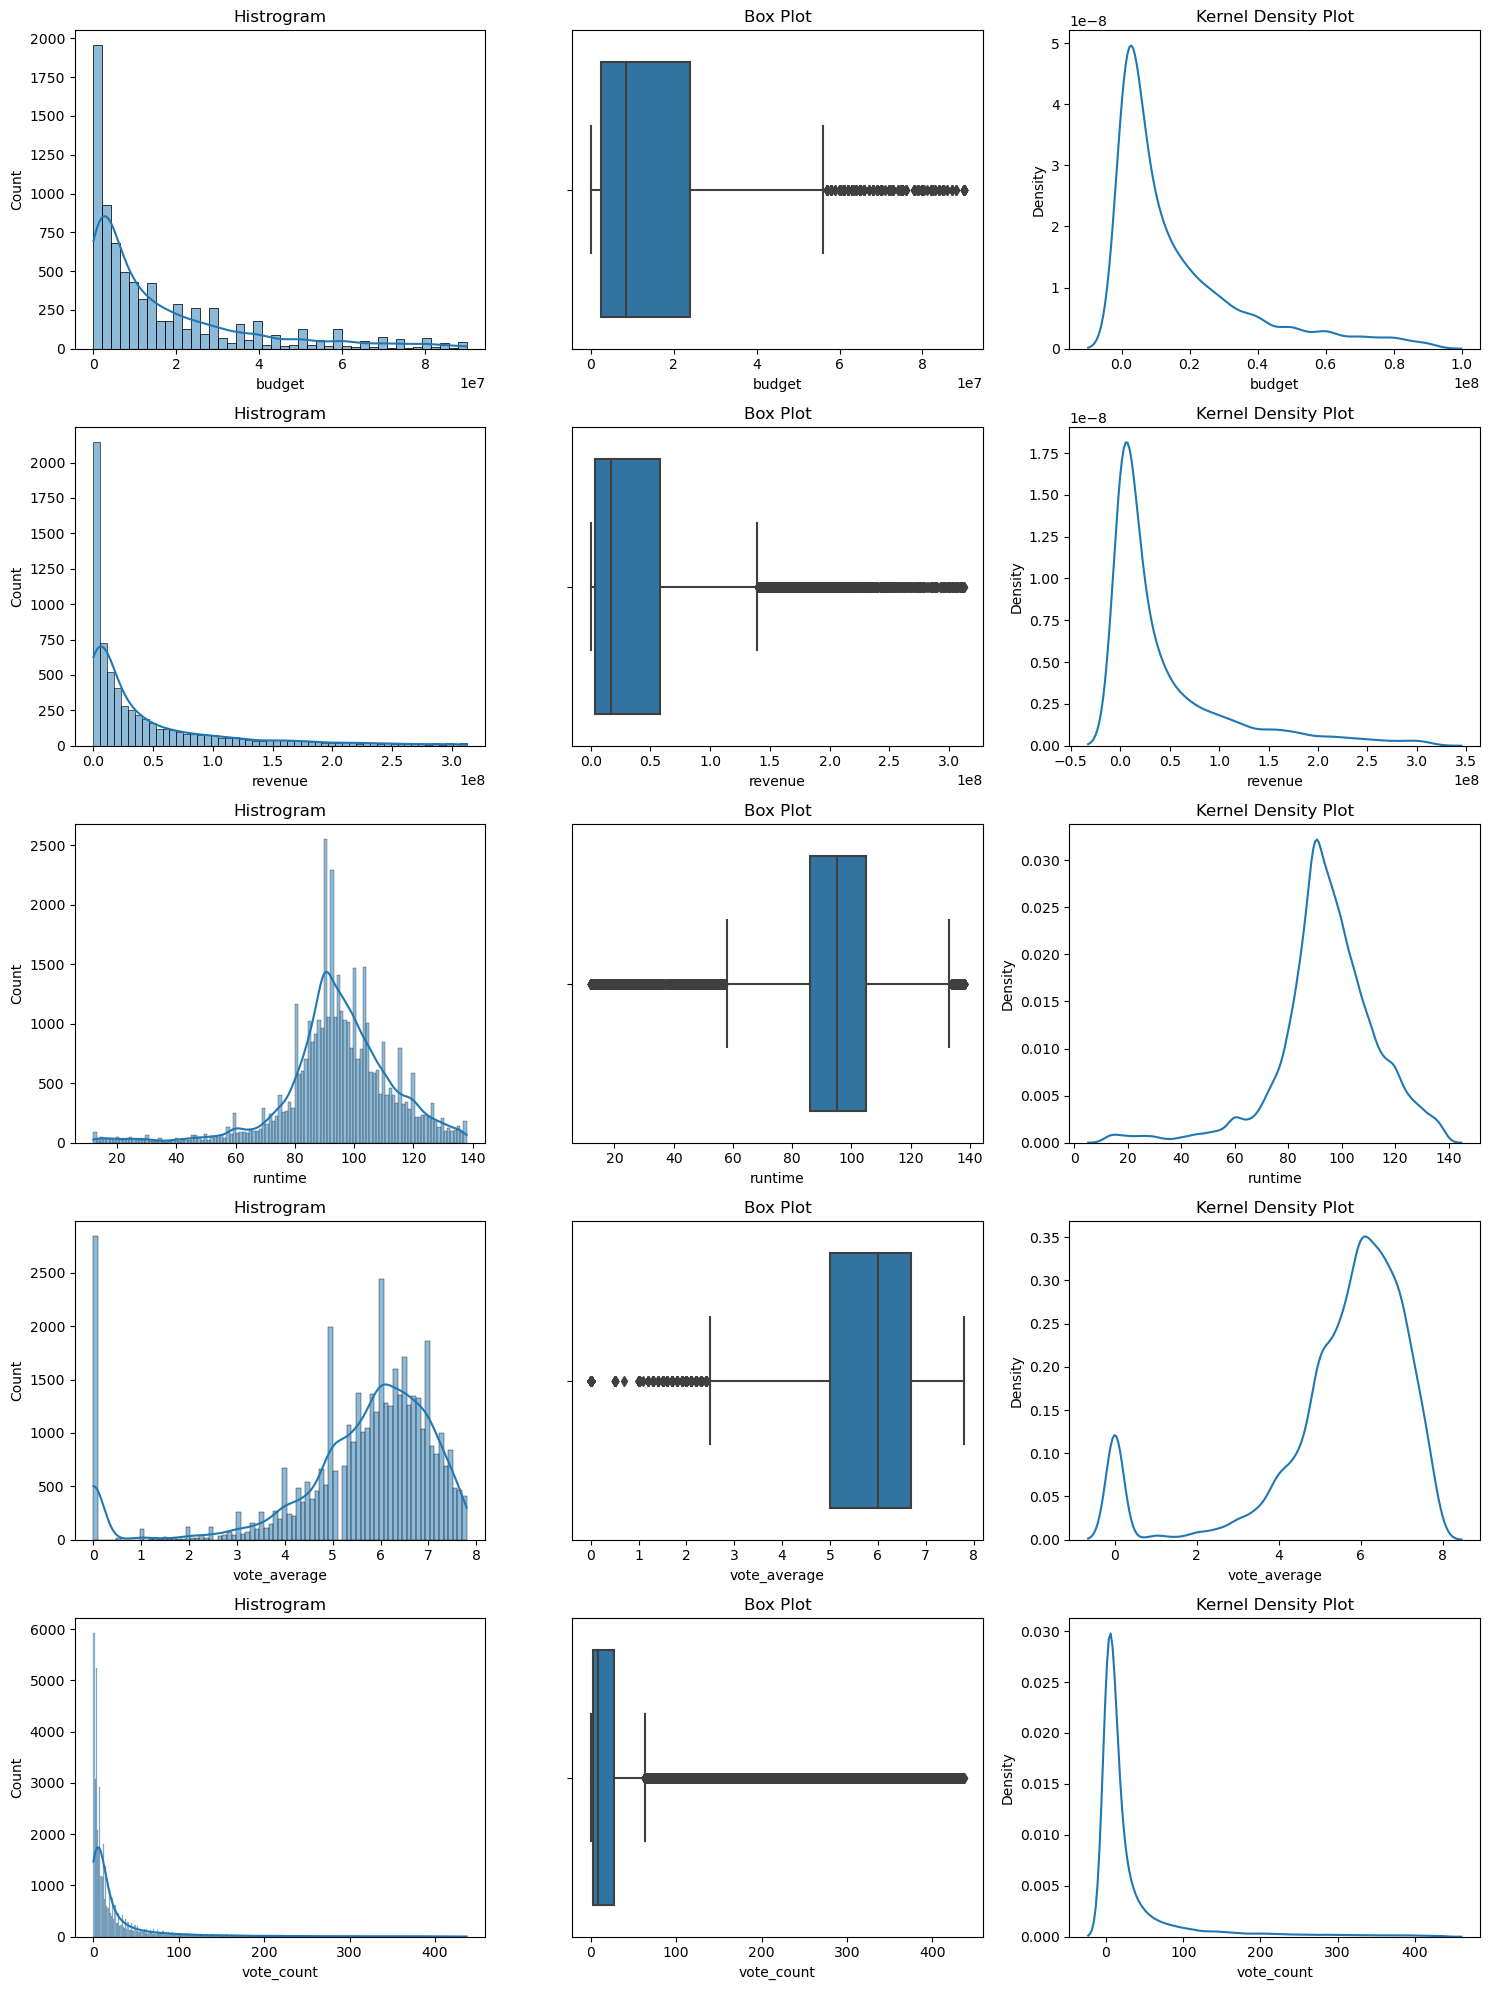

In [59]:
fig, axs = plt.subplots(5,3, figsize=(15,20))

column_to_analyze = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']

for i, column in enumerate(column_to_analyze):
    percentile_5 = movies[column].quantile(0.05)
    percentile_95 = movies[column].quantile(0.95)
    
    filtered_data = movies[(movies[column] >= percentile_5) & (movies[column]<=percentile_95)]
    
    sns.histplot(data=filtered_data, x=column, ax = axs[i,0], kde = True)
    axs[i,0].set_title('Histrogram')
    axs[i,0].set_xlabel(column)
    
    sns.boxplot(data=filtered_data, x=column, ax=axs[i, 1])
    axs[i,1].set_title('Box Plot')
    axs[i,1].set_xlabel(column)
    
    sns.kdeplot(data=filtered_data, x=column, ax=axs[i, 2])
    axs[i,2].set_title('Kernel Density Plot')
    axs[i,2].set_xlabel(column)

plt.tight_layout()
plt.show()

## Bivariate Analysis

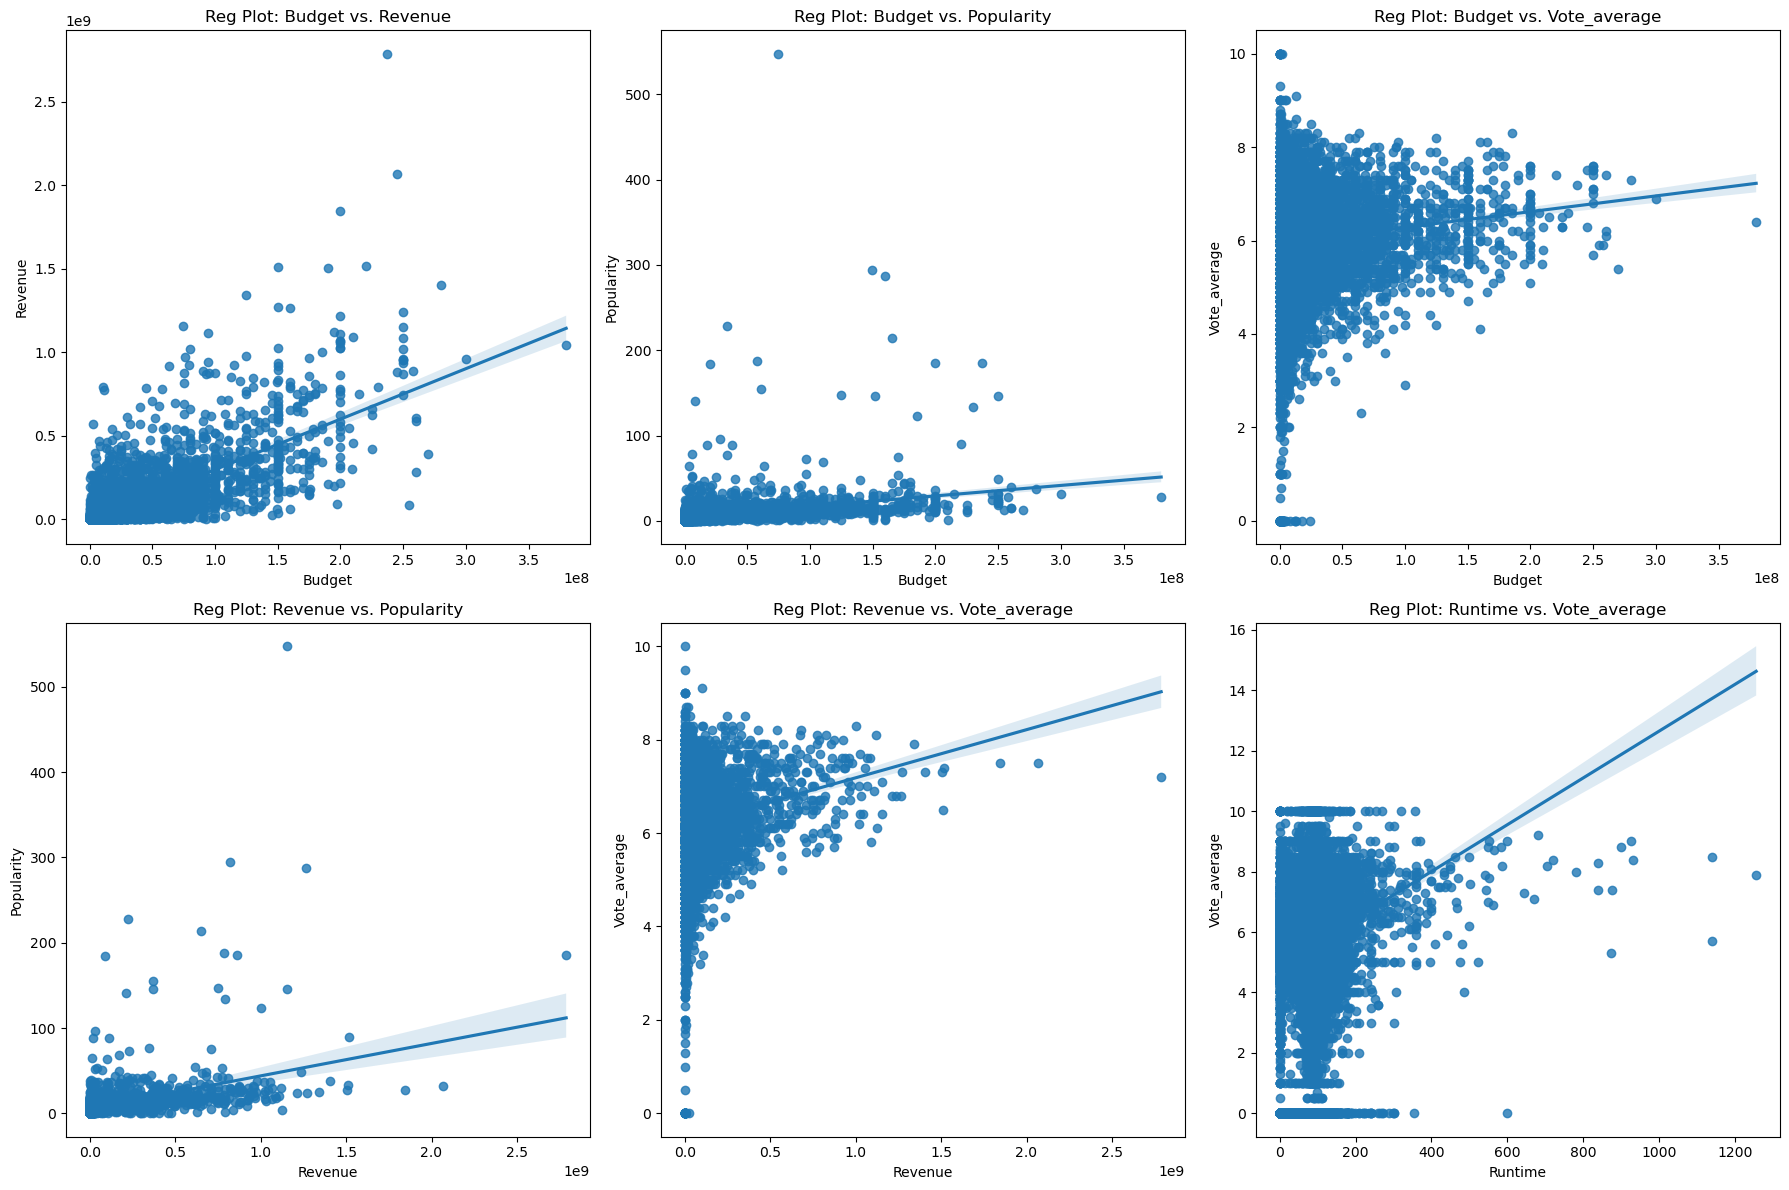

In [60]:
column_pairs = [('budget', 'revenue'), ('budget', 'popularity'), ('budget', 'vote_average'),
               ('revenue', 'popularity'), ('revenue', 'vote_average'), ('runtime', 'vote_average')]

fig, axes = plt.subplots(2,3, figsize=(18,12))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(column_pairs):
    sns.regplot(data=movies, x=x_col, y=y_col, ax=axes[i])
    axes[i].set_title(f'Reg Plot: {x_col.capitalize()} vs. {y_col.capitalize()}')
    axes[i].set_xlabel(x_col.capitalize())
    axes[i].set_ylabel(y_col.capitalize())
    
plt.tight_layout()
plt.show()

## Multivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



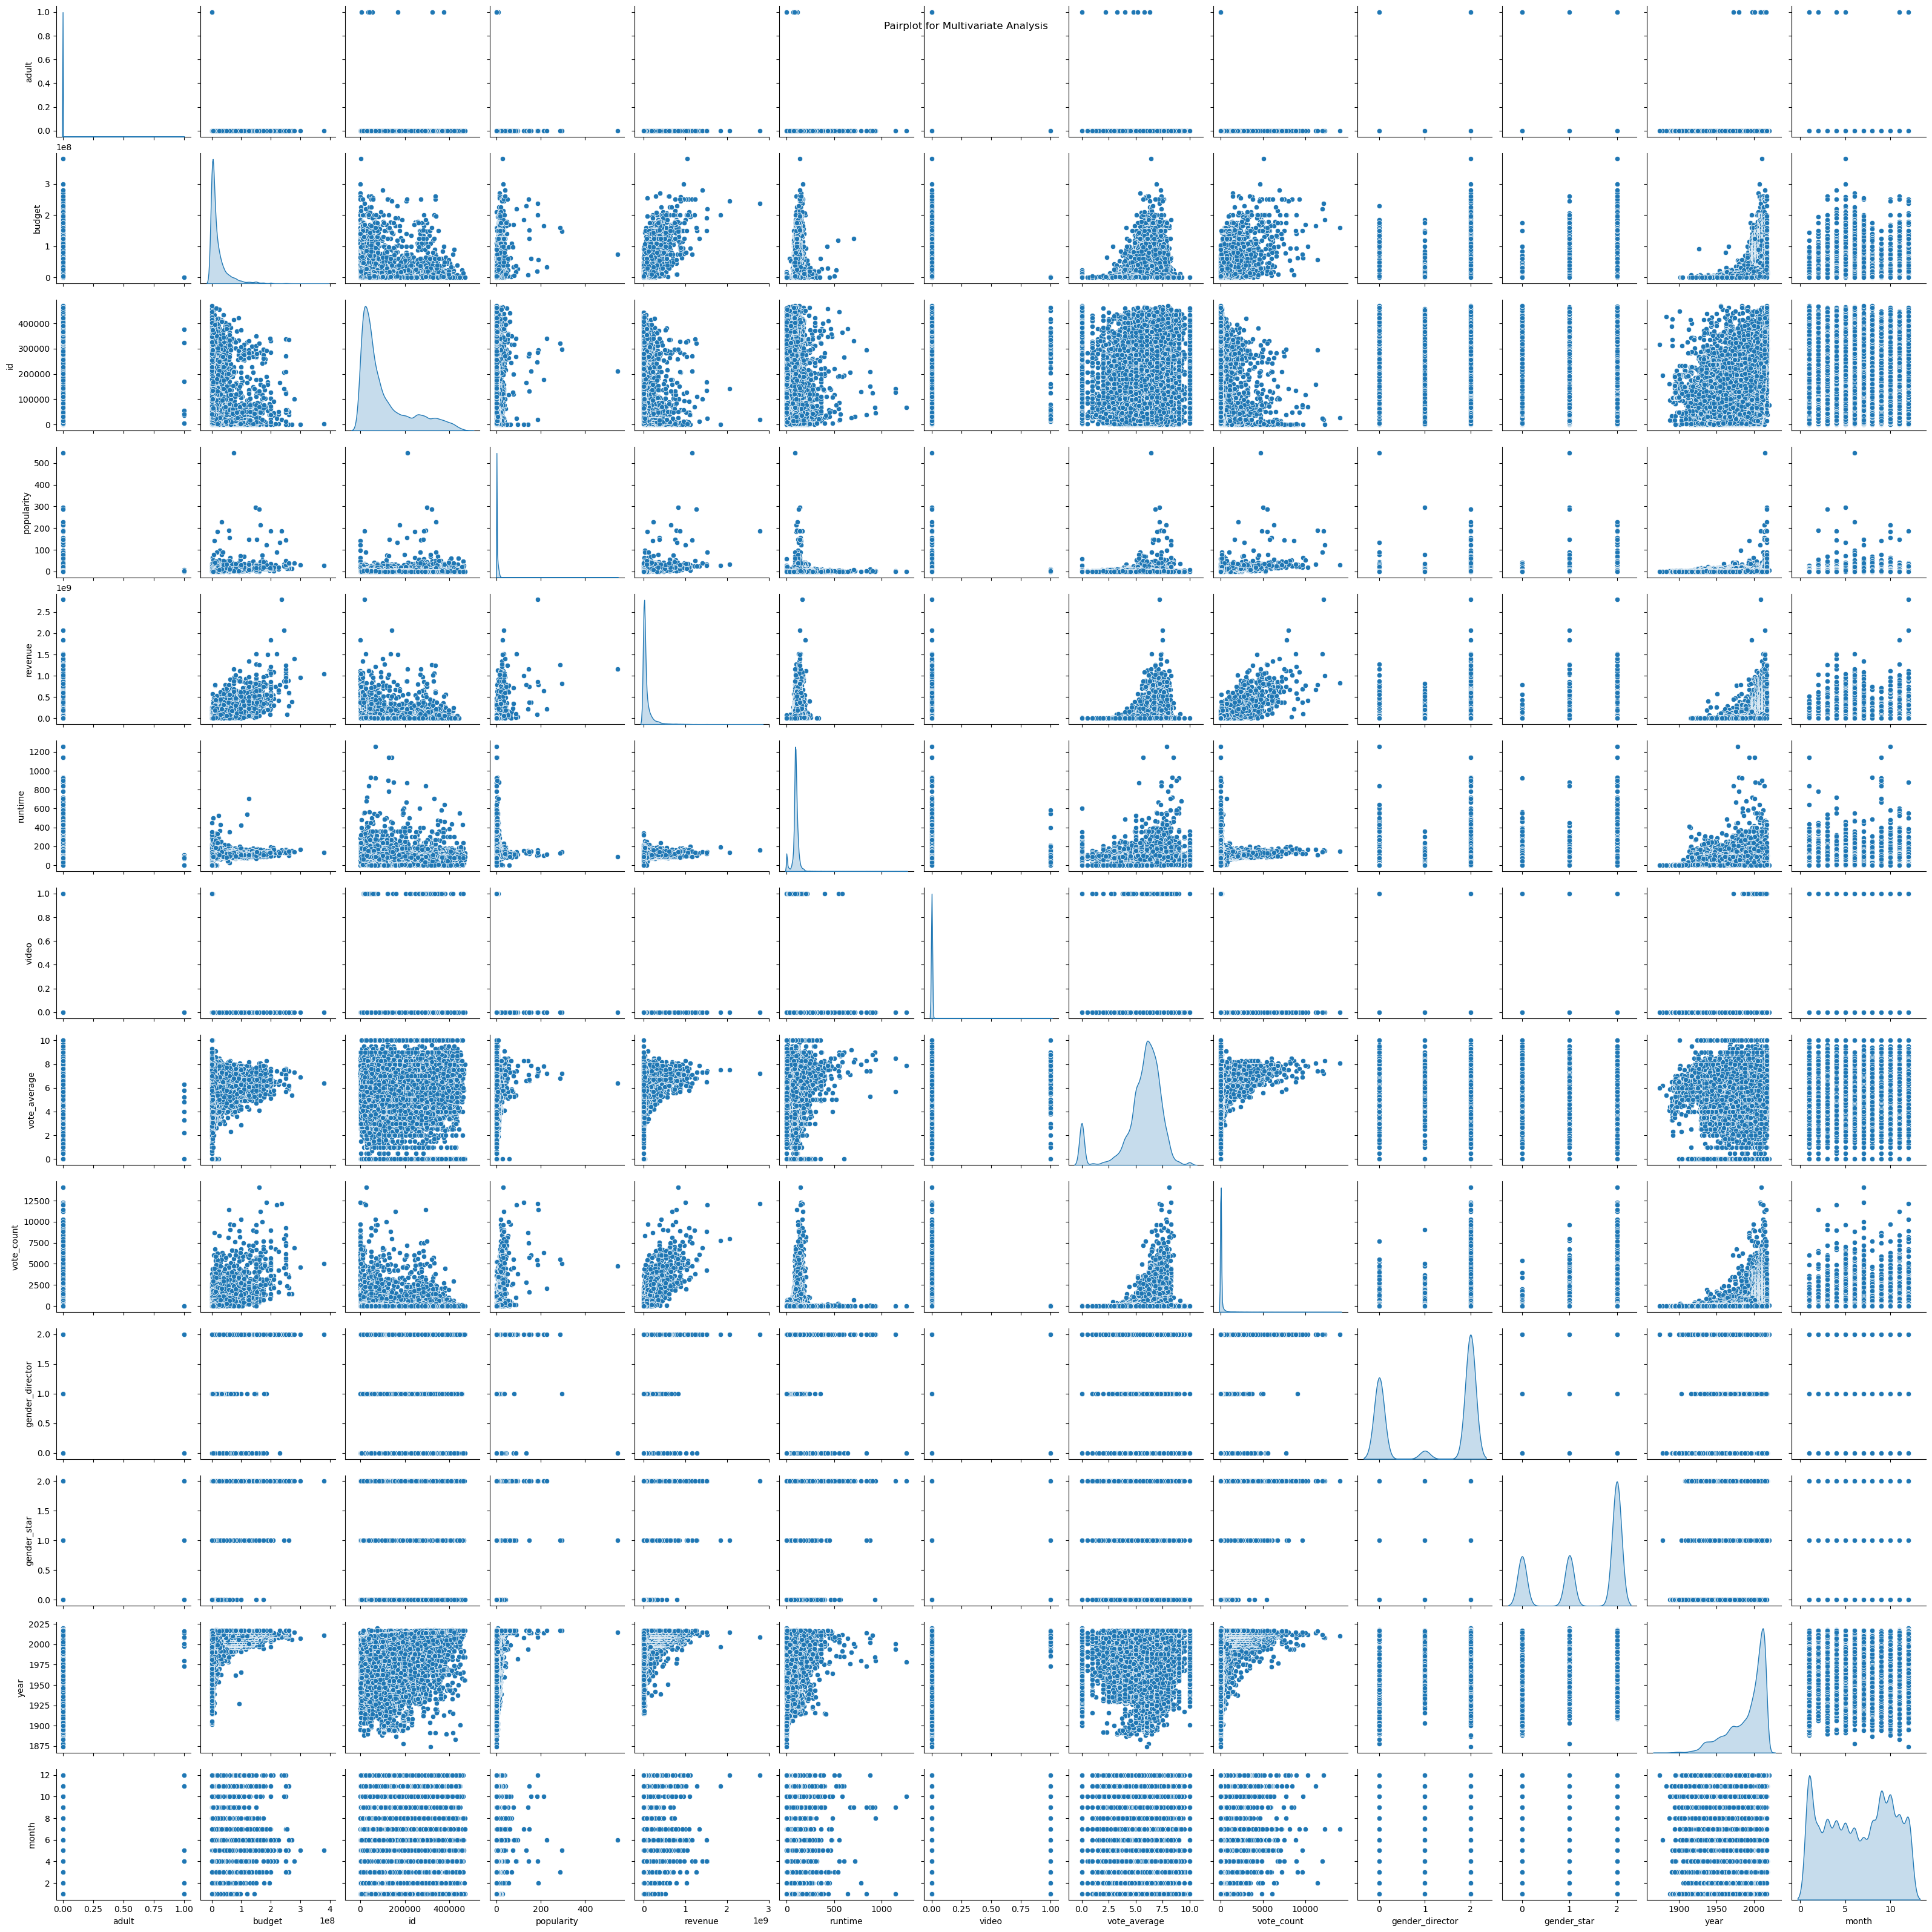

In [61]:
sns.pairplot(data=movies, diag_kind='kde')
plt.suptitle('Pairplot for Multivariate Analysis')
plt.show()

/tmp/ipykernel_20/660561400.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



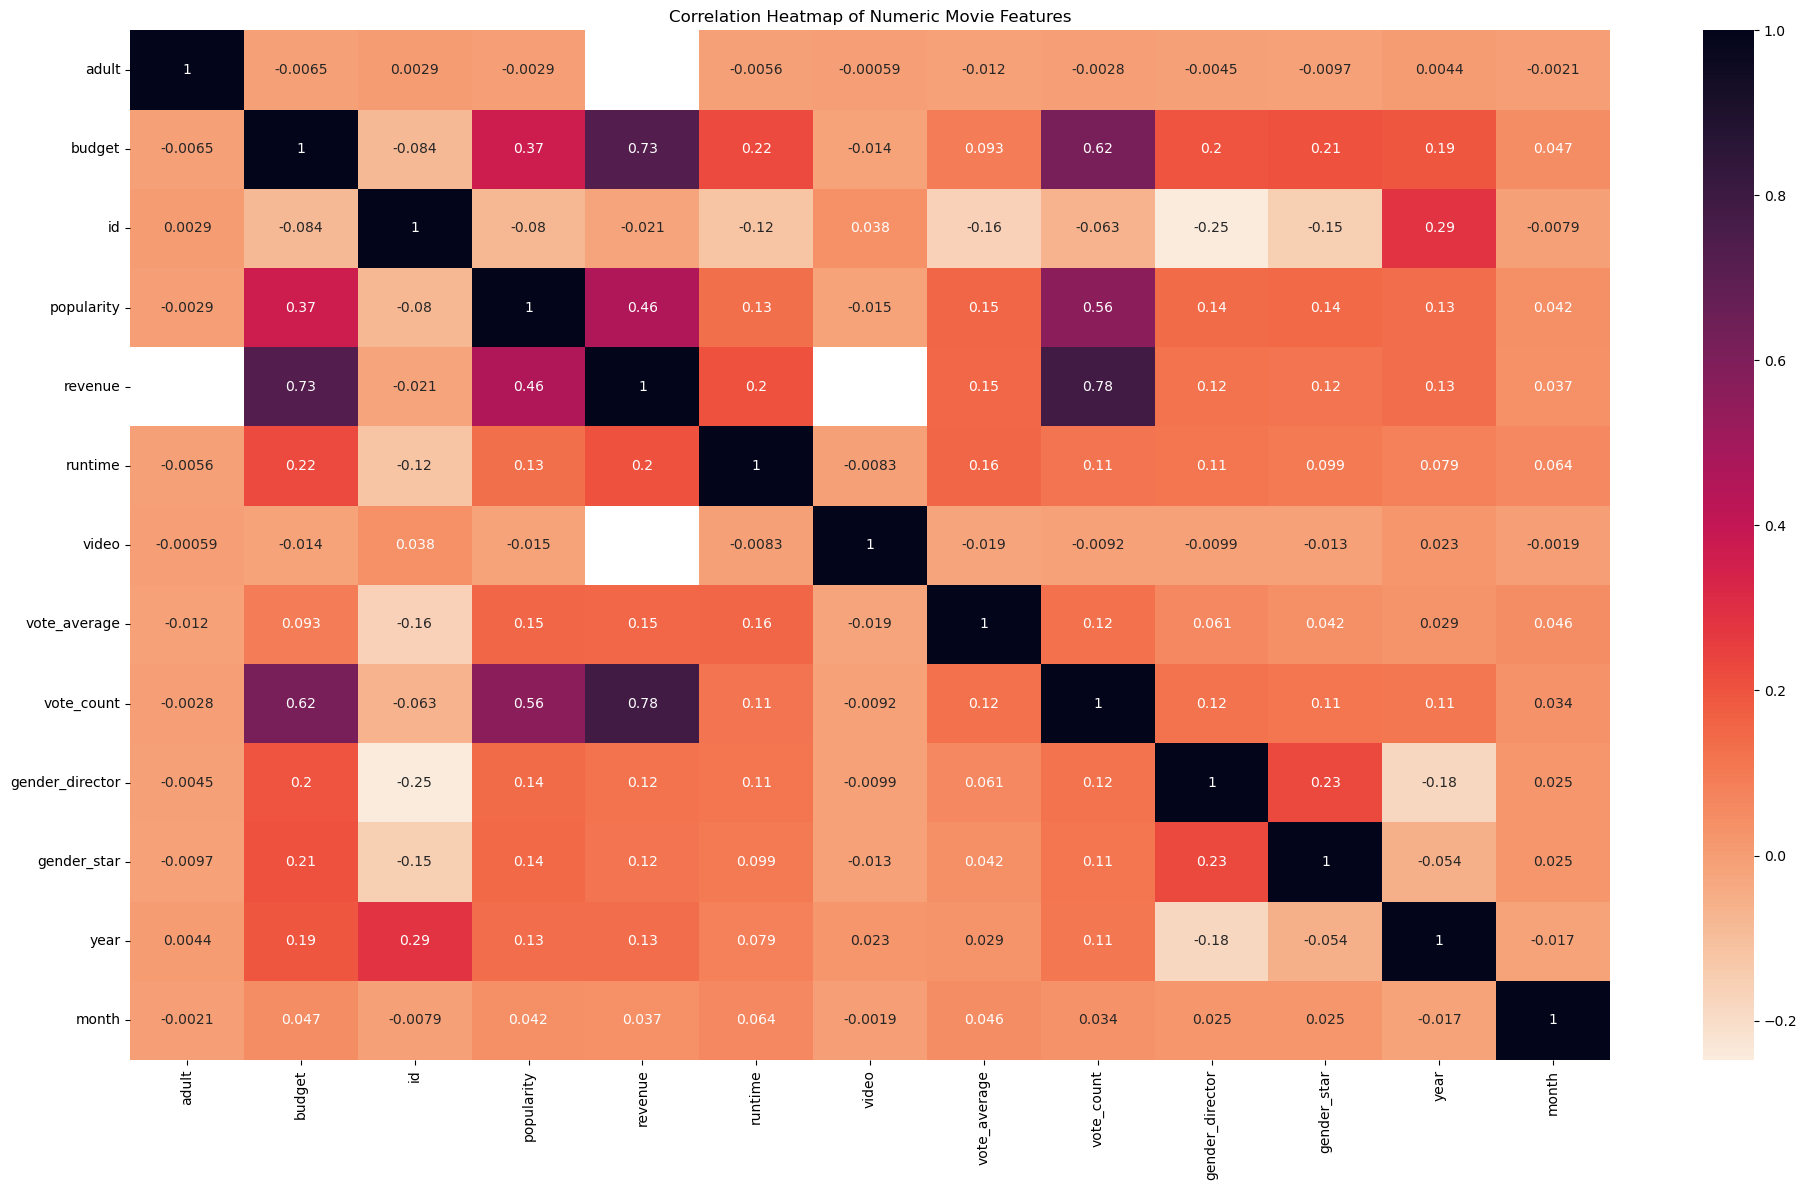

In [62]:
plt.figure(figsize=(20,12))
sns.heatmap(movies.corr(), annot=True, cmap='rocket_r')
plt.title('Correlation Heatmap of Numeric Movie Features')
plt.tight_layout()
plt.show()

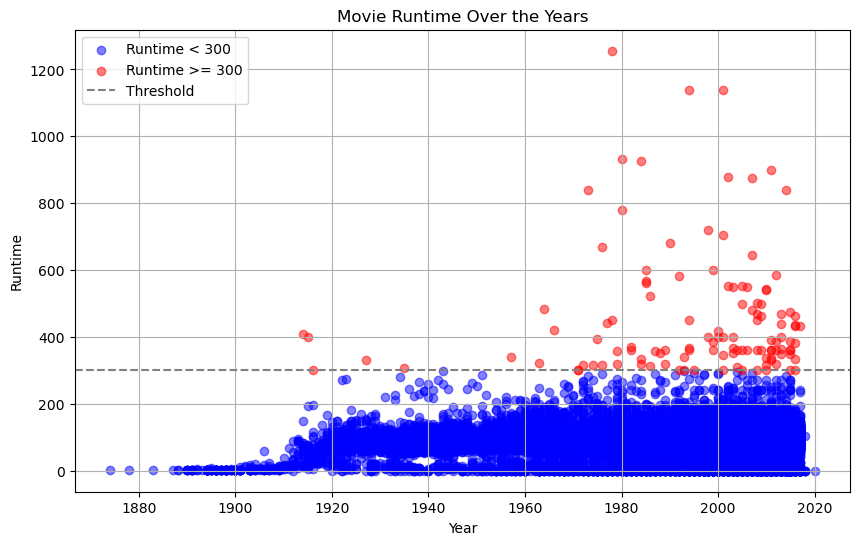

In [63]:
plt.figure(figsize=(10,6))

plt.scatter(movies[movies['runtime'] < 300]['year'], movies[movies['runtime'] < 300]['runtime'], color = 'blue', label = "Runtime < 300", alpha = 0.5)

plt.scatter(movies[movies['runtime']>=300]['year'], movies[movies['runtime'] >=300]['runtime'], color = 'red', label = 'Runtime >= 300', alpha = 0.5)

plt.axhline(y=300, color='gray', linestyle='--', label = 'Threshold')

plt.xlabel('Year')
plt.ylabel('Runtime')
plt.title('Movie Runtime Over the Years')
plt.legend()
plt.grid(True)
plt.show()

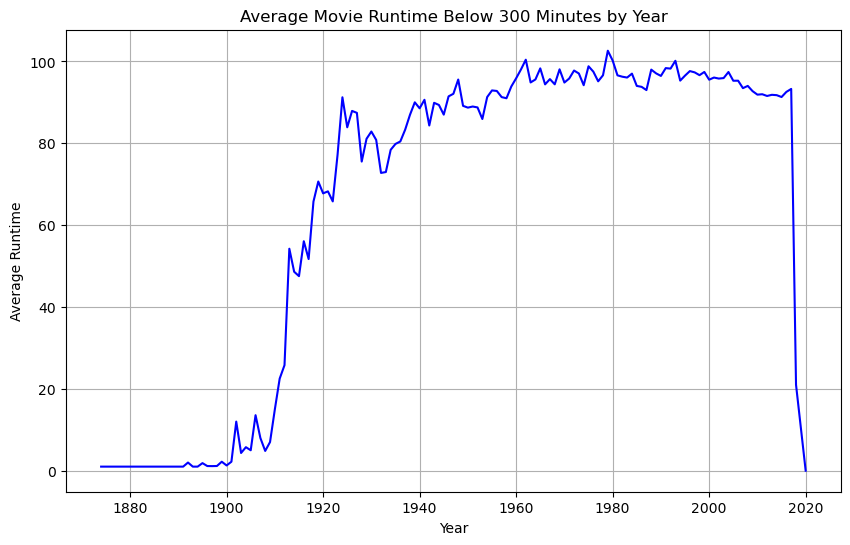

In [64]:
average_runtime_by_year = movies[movies['runtime'] <300].groupby('year')['runtime'].mean()

plt.figure(figsize=(10,6))
plt.plot(average_runtime_by_year.index, average_runtime_by_year.values, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Average Runtime')
plt.title("Average Movie Runtime Below 300 Minutes by Year")
plt.grid(True)
plt.show()

In [65]:
index_of_max_runtime = movies['runtime'].idxmax()
movies.loc[index_of_max_runtime]

adult                                                                   0
budget                                                                NaN
genres                                                   [Drama, History]
id                                                                67493.0
original_language                                                      en
original_title                                                 Centennial
popularity                                                       0.664727
production_companies                               [Universal Television]
production_countries                           [United States of America]
release_date                                          1978-10-01 00:00:00
revenue                                                               NaN
runtime                                                            1256.0
status                                                           Released
title                                 

In [66]:
movies_in_2020 = movies[movies['year'] == 2020]
num_movies_in_2020 = len(movies_in_2020)
print(f"Number of Movies made in 2020: {num_movies_in_2020}")

Number of Movies made in 2020: 1


## Predictive Analytics

In [67]:
train_df = movies.copy()

In [68]:
train_df.isnull().sum()

adult                       0
budget                  36234
genres                      0
id                          0
original_language           0
original_title              0
popularity                  0
production_companies        0
production_countries        0
release_date                0
revenue                 37709
runtime                     0
status                      0
title                       0
video                       0
vote_average                0
vote_count                  0
cast                        0
crew                        0
director                  782
starring                 2302
gender_director           782
gender_star              2302
year                        0
month                       0
dtype: int64

In [69]:
train_df.dropna(inplace=True)

In [70]:
train_df.shape

(5379, 25)

In [71]:
train_df.genres

0             [Animation, Comedy, Family]
1            [Adventure, Fantasy, Family]
3                [Comedy, Drama, Romance]
5        [Action, Crime, Drama, Thriller]
8           [Action, Adventure, Thriller]
                       ...               
44921             [Action, Comedy, Drama]
45065                     [Crime, Comedy]
45075                     [Comedy, Drama]
45077                    [Romance, Drama]
45087    [Action, Comedy, Crime, Foreign]
Name: genres, Length: 5379, dtype: object

In [72]:
s = pd.Series(train_df['genres'], dtype = str)
s1 = s.str.split(pat="'", expand=True)

In [73]:
train_df['genre_first'] = s1[1]

In [74]:
train_df['genre_first']

0        Animation
1        Adventure
3           Comedy
5           Action
8           Action
           ...    
44921       Action
45065        Crime
45075       Comedy
45077      Romance
45087       Action
Name: genre_first, Length: 5379, dtype: object

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5379 entries, 0 to 45087
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 5379 non-null   int64         
 1   budget                5379 non-null   float64       
 2   genres                5379 non-null   object        
 3   id                    5379 non-null   float64       
 4   original_language     5379 non-null   object        
 5   original_title        5379 non-null   object        
 6   popularity            5379 non-null   float64       
 7   production_companies  5379 non-null   object        
 8   production_countries  5379 non-null   object        
 9   release_date          5379 non-null   datetime64[ns]
 10  revenue               5379 non-null   float64       
 11  runtime               5379 non-null   float64       
 12  status                5379 non-null   object        
 13  title            

In [76]:
train_df.dropna(inplace=True)

In [77]:
train_df.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
director                0
starring                0
gender_director         0
gender_star             0
year                    0
month                   0
genre_first             0
dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [79]:
categorical_columns = ['genre_first']
numeric_columns = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

target = 'revenue'

X = train_df[categorical_columns + numeric_columns]
y = train_df[target]

In [80]:
categorical_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', StandardScaler(), numeric_columns) 
    ]
)

model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', LinearRegression())])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre_first']),
                                                 ('num', StandardScaler(),
                                                  ['budget', 'popularity',
                                                   'runtime', 'vote_average',
                                                   'vote_count'])])),
                ('regressor', LinearRegression())])

In [83]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")

R-squared (R2) Score: 0.67


In [84]:
categorical_transformer = model.named_steps['preprocessor'].named_transformers_['cat']
one_hot_encoder = categorical_transformer.named_steps['onehot']

feature_names_after_encoding = one_hot_encoder.get_feature_names_out(input_features = categorical_columns)

all_feature_names = np.concatenate([feature_names_after_encoding, numeric_columns])

coefs = model.named_steps['regressor'].coef_

importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': coefs})

importance_df['AbsImportance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Importance', ascending = False)

importance_df

Feature    Importance  AbsImportance
24                   vote_count  8.182081e+07   8.182081e+07
7            genre_first_Family  7.035846e+07   7.035846e+07
20                       budget  6.906588e+07   6.906588e+07
2         genre_first_Animation  5.332789e+07   5.332789e+07
16         genre_first_TV Movie  4.219747e+07   4.219747e+07
21                   popularity  1.536743e+07   1.536743e+07
5       genre_first_Documentary  1.291301e+07   1.291301e+07
14          genre_first_Romance  6.806991e+06   6.806991e+06
22                      runtime  5.813449e+06   5.813449e+06
3            genre_first_Comedy  4.976604e+06   4.976604e+06
9           genre_first_Foreign  4.726608e+06   4.726608e+06
12            genre_first_Music  3.595861e+06   3.595861e+06
1         genre_first_Adventure  5.071936e+05   5.071936e+05
23                 vote_average -9.300431e+05   9.300431e+05
11           genre_first_Horror -3.614472e+06   3.614472e+06
10          genre_first_History -4.780179e+06   4.780179e+06
6             genre_first_Drama -1.345145e+07   1.345145e+07
8           genre_first_Fantasy -1.560943e+07   1.560943e+07
0            genre_first_Action -1.860338e+07   1.860338e+07
13          genre_first_Mystery -1.867691e+07   1.867691e+07
4             genre_first_Crime -2.303925e+07   2.303925e+07
19          genre_first_Western -2.415862e+07   2.415862e+07
15  genre_first_Science Fiction -2.562430e+07   2.562430e+07
17         genre_first_Thriller -2.584191e+07   2.584191e+07
18              genre_first_War -2.601018e+07   2.601018e+07

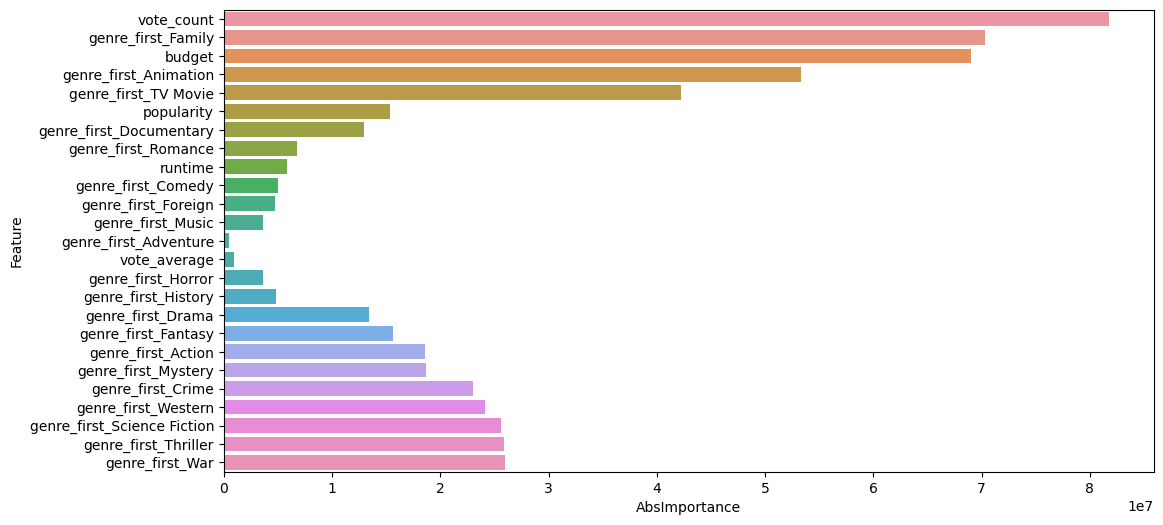

In [85]:
plt.figure(figsize=(12,6))
sns.barplot(data=importance_df, x='AbsImportance', y='Feature', orient='h')
plt.show()

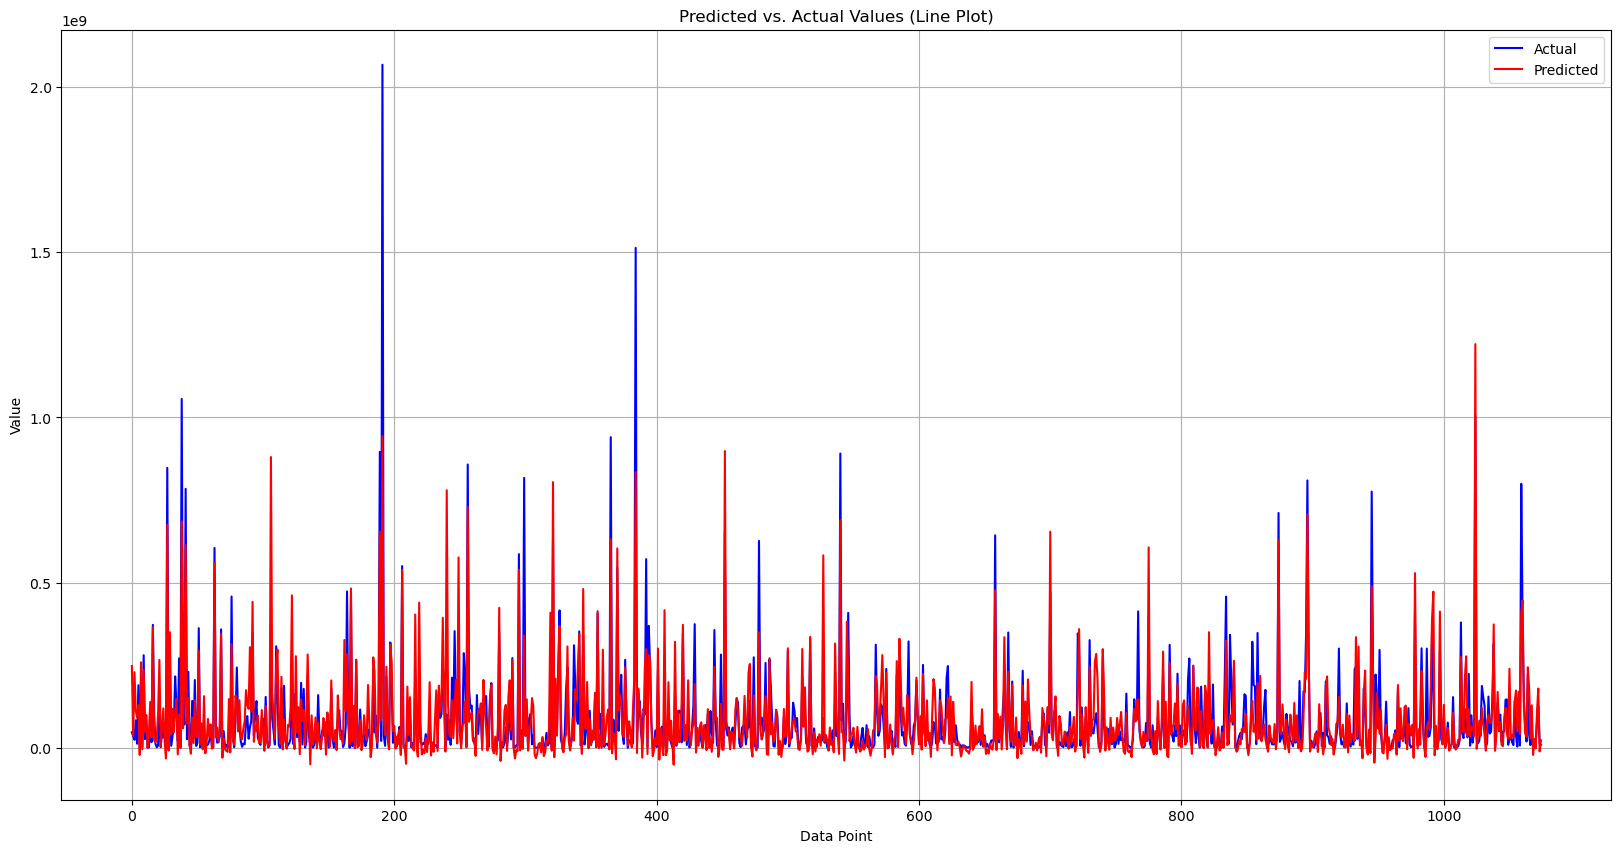

In [86]:
x = range(len(y_test))
plt.figure(figsize=(20,10))

plt.plot(x, y_test, label='Actual', color = 'blue')
plt.plot(x, y_pred, label='Predicted', color='red')

plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.title('Predicted vs. Actual Values (Line Plot)')

plt.grid(True)
plt.show()

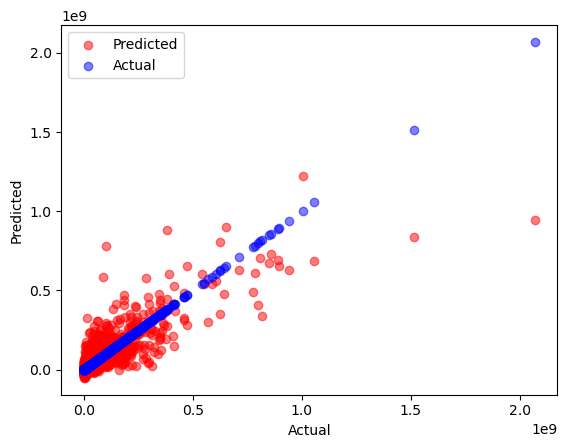

In [87]:
plt.scatter(y_test, y_pred, c='red', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='blue', label='Actual', alpha=0.5)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.show()

## Conclusion

Feature Importance and Model Insights: